# Библиотека clifford

## Двумерное пространство

In [14]:
import clifford as cf

layout, blades = cf.Cl(2)
locals().update(blades)

In [15]:
a = 4*e1 + 3*e2

b = 5*e1 + 2*e2

In [16]:
a^b, b^a #Внешнее произведение

(-(7^e12), (7^e12))

In [17]:
e1.right_complement() #Правое дополнение

(1^e2)

In [18]:
e1.left_complement() #Левое дополнение

-(1^e2)

In [19]:
#Отражение
vec = 2*e1 + 3*e2     #вектор
ref = 6*e1        #отражатель

-ref*vec*ref.inv()  #отразить вектор в гиперплоскости, нормальной к отражателю

-(2.0^e1) + (3.0^e2)

In [20]:
#Поворот
from math import e, pi

R = e**(pi/4*e12)  #вращатель на заданный угол
print(R, '\n',
      R*vec*~R) #вращать вектор на pi/2 в плоскости e12

0.70711 + (0.70711^e12) 
 (3.0^e1) - (2.0^e2)


## Трехмерное пространство

In [21]:
import clifford as cf

layout, blades = cf.Cl(3)
locals().update(blades)

In [22]:
U = 4 + 2*e1 + 3*e12 + 5*e123 #Мультвектор
V = 6*e1 + 2*e12 + 3*e23 + 1*e123

U, V

(4 + (2^e1) + (3^e12) + (5^e123), (6^e1) + (2^e12) + (3^e23) + (1^e123))

In [23]:
U*V #Геометрическое умножение

1 + (9^e1) - (14^e2) - (13^e3) + (8^e12) + (9^e13) + (44^e23) + (10^e123)

In [24]:
#Мнимая единица в трехмерном пространстве
I = e123

print(I*I, '\n', #Единичный элемент объема обладает свойтсвами мнимой единицы
      e3*I, '\n', #примеры
      I*e3, '\n',
      e23*I, '\n',
      I*e23)

-1 
 (1^e12) 
 (1^e12) 
 -(1^e1) 
 -(1^e1)


In [25]:
#Умножение произвольного бивектора в трехмерном пространстве на самого себя.
w = 6*e12 + 2*e23 + 3*e13
w*w

-49

## В двухмерном пространстве мультивектор вида M = a + b*e12 обладает всеми свойствами комплексного числа z = a + bi.

In [21]:
import clifford as cf

layout, blades = cf.Cl(2)
locals().update(blades)

In [22]:
M = 3 + 2*e12 #Мультвектор
print(M, '\n',
      M+M, '\n', #сложение
      M*M, '\n', #умножение
      M/M, '\n', #деление
      M*3, '\n', #умножение на действительное число
      M.inv(), '\n', #обратная
      ~M) #сопряжение

3 + (2^e12) 
 6 + (4^e12) 
 5 + (12^e12) 
 1.0 
 9 + (6^e12) 
 0.23077 - (0.15385^e12) 
 3 - (2^e12)


In [23]:
z = 3 + 2j #Комплексное число 
print(z, '\n',
      z+z, '\n', #сложение
      z*z, '\n', #умножение
      z/z, '\n', #деление
      z*3, '\n', #умножение на действительное число
      z**(-1), '\n', #обратная
      z.conjugate()) #сопряжение

(3+2j) 
 (6+4j) 
 (5+12j) 
 (1+0j) 
 (9+6j) 
 (0.23076923076923078-0.15384615384615385j) 
 (3-2j)


# Повороты с помощью комплексных чисел

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#import matplotlib_inline
from ipywidgets import interact, fixed

In [3]:
# matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.style.use('default_colors.mplstyle')

In [6]:
P = np.array([1 + 1j])
O = np.array([0, 0])

При работе с комплексными числами для поворотом, мы используем радиус векторы. Поэтому нам нужно лишь отобразить точки комплексными числами и провести радиус векторы к этим точкам.

ValueError: not enough values to unpack (expected 2, got 1)

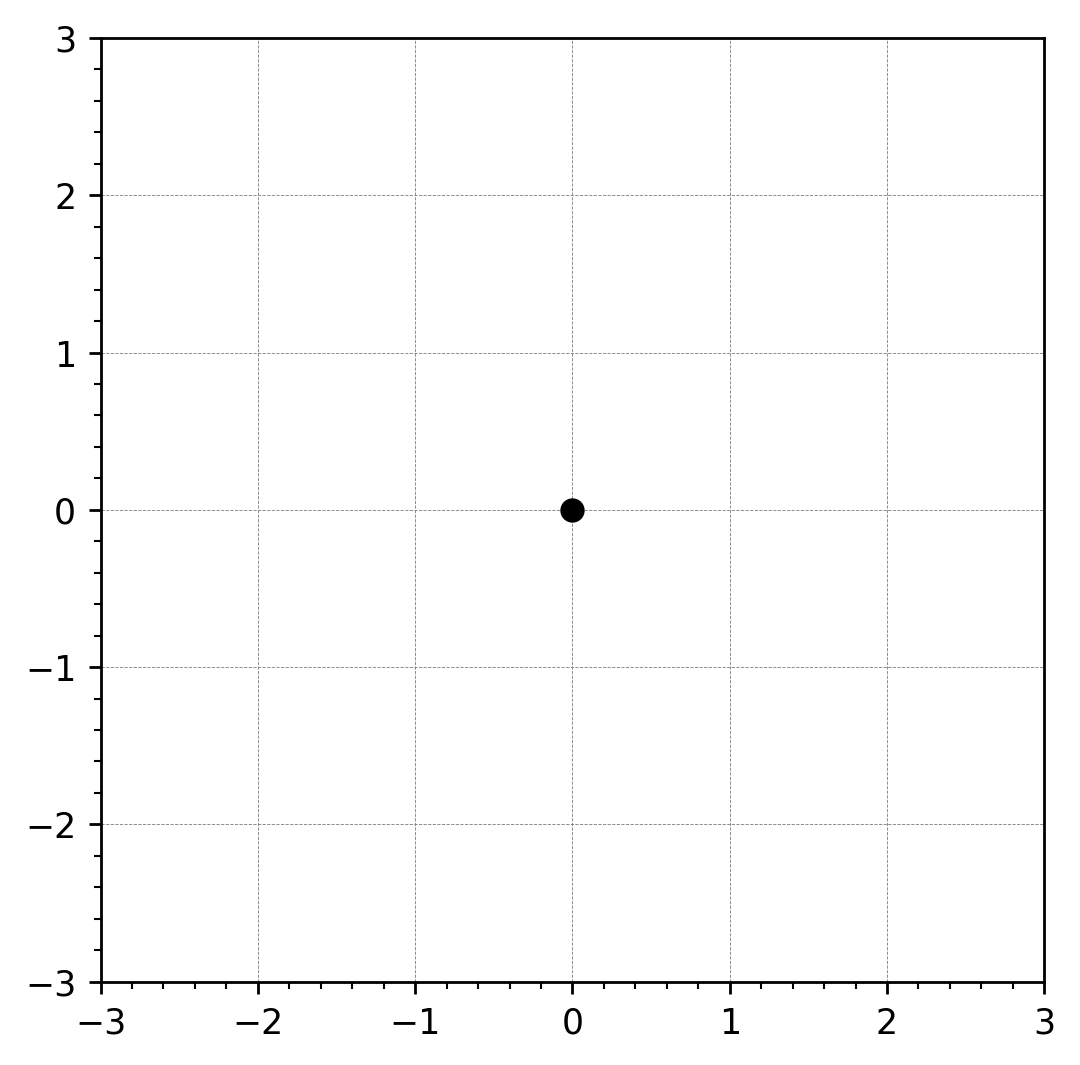

In [9]:
fig01 = plt.figure(num=1, figsize=(5, 5))
ax01 = fig01.add_subplot(1, 1, 1)

# Оформляем систему координат
ax01.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal')

ax01.plot(*O, marker='o', color='black')

ax01.add_patch(patches.Polygon(xy=np.array([P.real,P.imag]).T, fill=False, closed=True))

ax01.arrow(*O, P.real[0], P.imag[0], color='black', **arrow_params)

#Вращаем векторы по кругу меняя угол
P_new = np.exp(np.radians(45)*1j) * P

ax01.add_patch(patches.Polygon(xy=np.array([P_new.real,P_new.imag]).T, fill=False, closed=True))

ax01.arrow(*O, P_new.real[0], P_new.imag[0], color='red', **arrow_params)

In [3]:
P = np.array([1 + 1j, 2 + 1j])
O = np.array([0, 0])

In [17]:
print(f"""P = {P}
X = {P.real}
Y = {P.imag}""")

P = [1.+1.j 2.+1.j]
X = [1. 2.]
Y = [1. 1.]


In [19]:
# Хотим повернуться на 30 градусов
θ = np.radians(45)

# Комплексное число, которое нам этот поворот даст
r = np.exp(θ*1j)

r*P

array([0.        +1.41421356j, 0.70710678+2.12132034j])

In [7]:
width = 0.01
arrow_params = dict(width=width,
                    length_includes_head=True,
                    head_width=10*width)

[1.+1.j 2.+1.j]
[-0.15834168+1.40532128j  0.46514812+2.18715277j]
[-1.19744885+0.75240698j -1.41996978+1.72733489j]
[-1.33485261-0.46708513j -2.23582147-0.03320139j]
[-0.46708513-1.33485261j -1.368054  -1.76873635j]
[0.75240698-1.19744885j 0.52988604-2.17237676j]
[1.40532128-0.15834168j 2.02881109-0.94017316j]
[1.+1.j 2.+1.j]


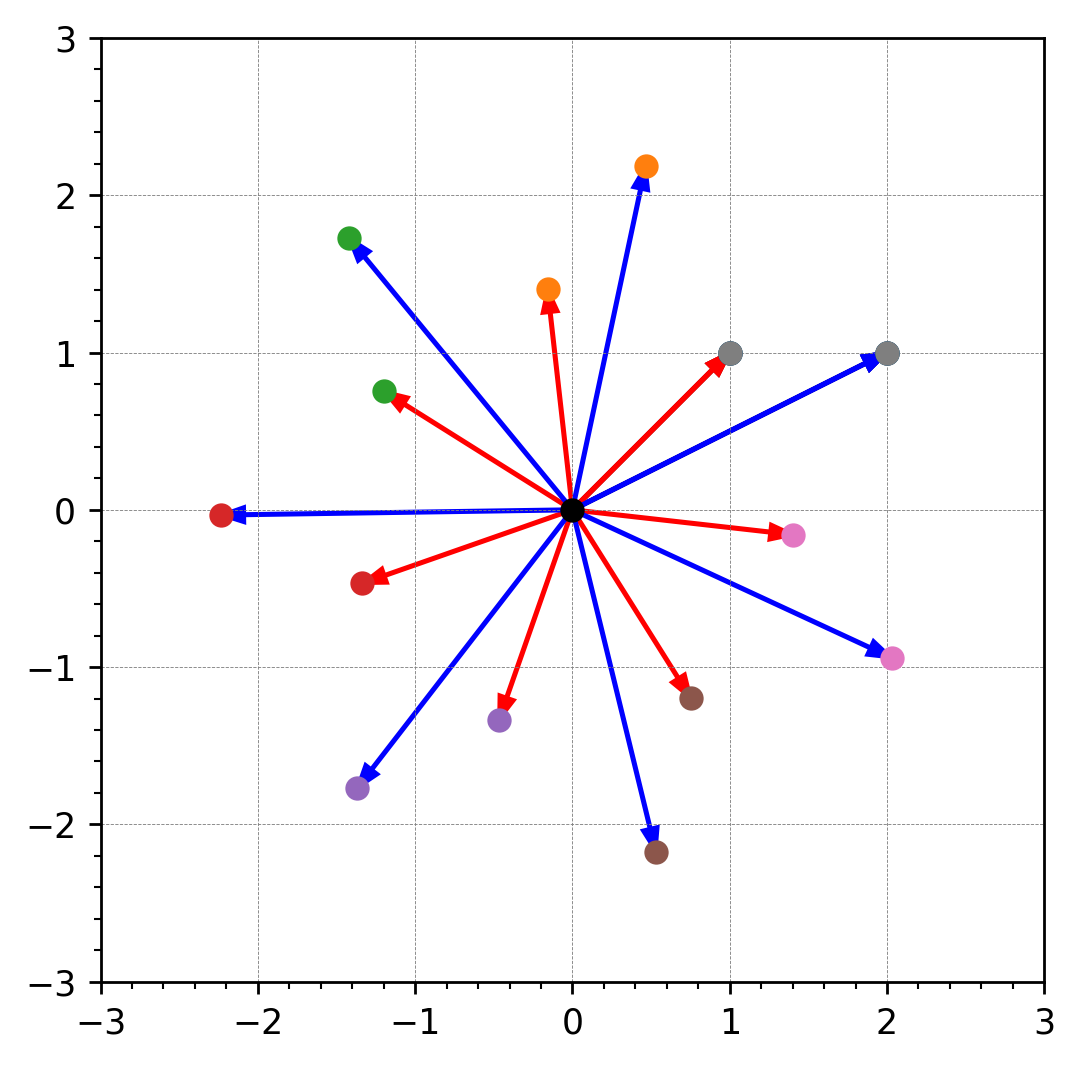

In [16]:
fig01 = plt.figure(num=1, figsize=(5, 5))
ax01 = fig01.add_subplot(1, 1, 1)

# Оформляем систему координат
ax01.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal')

ax01.plot(*O, marker='o', color='black')

ax01.add_patch(patches.Polygon(xy=np.array([P.real,P.imag]).T, fill=False, closed=True))
#ax01.plot(P.real, P.imag, marker='o', color='black', linestyle='None')

ax01.arrow(*O, P.real[0], P.imag[0], color='black', **arrow_params)
ax01.arrow(*O, P.real[1], P.imag[1], color='black', **arrow_params)

#Вращаем векторы по кругу меняя угол
for θ in np.linspace(0,2*np.pi,7):

    P_new = np.exp(θ*1j) * P

    ax01.add_patch(patches.Polygon(xy=np.array([P_new.real,P_new.imag]).T, fill=False, closed=True))
    #ax01.plot(P_new.real, P_new.imag, marker='o', linestyle='None')

    ax01.arrow(*O, P_new.real[0], P_new.imag[0], color='red', **arrow_params)
    ax01.arrow(*O, P_new.real[1], P_new.imag[1], color='blue', **arrow_params)

In [36]:
def replot(points, θ):
    """Рисуем многоугольник с вершинами `points`, повернутый на угол `θ`"""
    fig = plt.figure(num=2, figsize=(5, 5), clear=True)
    ax = fig.add_subplot(1, 1, 1)
    ax.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal')
    
    ax.plot(*O, marker='o', color='black')
    
    θ = np.radians(θ)
    P = np.exp(θ*1j) * points

    ax.add_patch(patches.Polygon(xy=np.array([P.real,P.imag]).T, fill=False, closed=True))
    ax.plot(P.real, P.imag, marker='o', linestyle='None')
    
    width = 0.01
    arrow_params = dict(width=width, length_includes_head=True, head_width=10*width)
    ax.arrow(*O, P.real[0], P.imag[0], color='red', **arrow_params)
    ax.arrow(*O, P.real[1], P.imag[1], color='blue', **arrow_params)
    plt.show()

In [37]:
interact(replot, points=fixed(P),  θ=(0, 360))

interactive(children=(IntSlider(value=180, description='θ', max=360), Output()), _dom_classes=('widget-interac…

<function __main__.replot(points, θ)>

# Повороты с помощью геометрической алгебры и библиотеки clifford

## Вращение через угол 

Задаем вращатель через экспоненциальный вид R = e^(pi/2*e12) и подставляем в формулу Rv~R.

In [64]:
from math import e, pi
import numpy as np
import clifford as cf

layout, blades = cf.Cl(2) #Создаем 2-мерную алгебру Клиффорда
locals().update(blades) #Обновляем базис

In [65]:
#Задаем точки, которые будем отражать через базис
P = np.array([(1, 1), (2, 1)])
P1, P2 = P

p1 = P1[0]*e1 + P1[1]*e2
p2 = P2[0]*e1 + P2[1]*e2

In [71]:
# Хотим повернуться на 30 градусов
θ = np.radians(45)
R = e**(θ*e12)

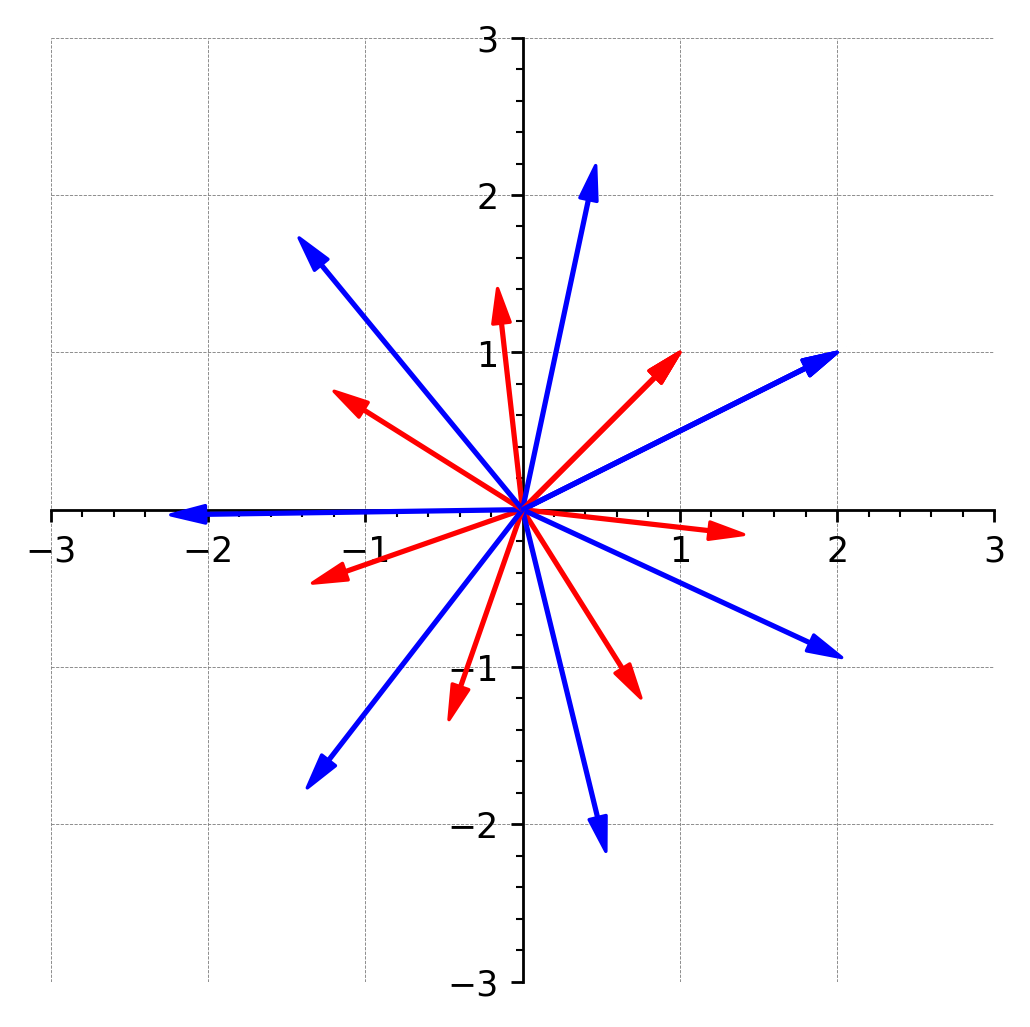

In [72]:
fig03 = plt.figure(num=2, figsize=(5, 5))
ax03 = fig03.add_subplot(1, 1, 1)

#Оформляем систему координат
ax03.set(
    xlim=(-3, 3),
    ylim=(-3, 3),
    aspect='equal',
    xticks=([-3, -2, -1, 1, 2, 3]),
    yticks=([-3, -2, -1, 1, 2, 3])
)

#Переносим оси кординат в центр
ax03.spines['top'].set_visible(False)
ax03.spines['right'].set_visible(False)

ax03.spines['bottom'].set_position('zero')
ax03.spines['left'].set_position('zero')

#Рисуем радиус векторы, через точки, которые ввели ранее
ax03.annotate(text="", xy=P1, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='red'))
ax03.annotate(text="", xy=P2, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='blue'))

#Вращаем векторы по кругу меняя угол
for θ in np.linspace(0,2*np.pi,8):
    
    p_new1 = e**(θ*e12)*p1*~e**(θ*e12)
    p_new2 = e**(θ*e12)*p2*~e**(θ*e12)
    
    P_new1 = np.array([p_new1.value[1], p_new1.value[2]])
    P_new2 = np.array([p_new2.value[1], p_new2.value[2]])
    
    ax03.annotate(text="", xy=P_new1, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='red'))
    ax03.annotate(text="", xy=P_new2, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='blue'))

## Отражение

Для поворотов методами геометрической алгебры мы используем библиотеку clifford, где точки, векторы, мультивекторы вводим через базис. Отражение реализуется через формулу v′= ava^-1.

In [137]:
import clifford as cf

layout, blades = cf.Cl(2) #Создаем 2-мерную алгебру Клиффорда
locals().update(blades) #Обновляем базис

In [138]:
#Задаем точки, которые будем отражать через базис
P = np.array([(1, 1), (2, 1)])
P1, P2 = P

p1 = P1[0]*e1 + P1[1]*e2
p2 = P2[0]*e1 + P2[1]*e2

In [139]:
#Задаем прямую, через которую будем отражать
A = np.array([(0, 0),(3, 6)])
AA = A[1]-A[0]

a = AA[0]*e1 + AA[1]*e2

Text(0, 0, '')

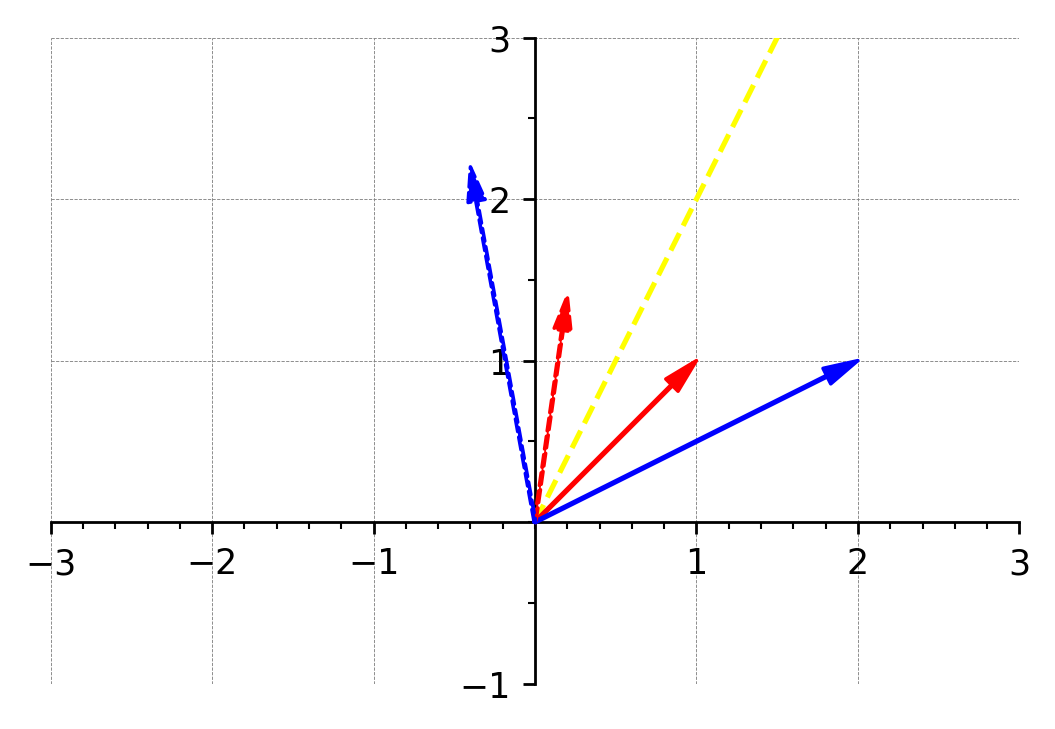

In [140]:
fig02 = plt.figure(num=2, figsize=(5, 5))
ax02 = fig02.add_subplot(1, 1, 1)

#Оформляем систему координат
ax02.set(
    xlim=(-3, 3),
    ylim=(-1, 3),
    aspect='equal',
    xticks=([-3, -2, -1, 1, 2, 3]),
    yticks=([-1, 1, 2, 3])
)

#Переносим оси кординат в центр
ax02.spines['top'].set_visible(False)
ax02.spines['right'].set_visible(False)

ax02.spines['bottom'].set_position('zero')
ax02.spines['left'].set_position('zero')

#Рисуем радиус векторы, через точки, которые ввели ранее
ax02.annotate(text="", xy=P1, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='red'))
ax02.annotate(text="", xy=P2, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='blue'))

#Рисуем прямую А
ax02.plot((A[0][0], A[1][0]),(A[0][1], A[1][1]), color='yellow', linestyle='--')

#Отражаем векторы через формулу v′= ava^-1
p_new1 = a*p1*(a.inv())
P_new1 = np.array([p_new1.value[1], p_new1.value[2]])

ax02.annotate(text="", xy=P_new1, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='red', linestyle='--'))

p_new2 = a*p2*(a.inv())
P_new2 = np.array([p_new2.value[1], p_new2.value[2]])

ax02.annotate(text="", xy=P_new2, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='blue', linestyle='--'))

## Вращение как композиция двух отражений

Вращение можно представить как композицию двух последовательных отражений. v′′= bav(ba)^−1

In [1]:
import clifford as cf

layout, blades = cf.Cl(2) #Создаем 2-мерную алгебру Клиффорда
locals().update(blades) #Обновляем базис

In [6]:
#Задаем точки, которые будем отражать через базис
P = np.array([(1, 1), (2, 1)])
P1, P2 = P

p1 = P1[0]*e1 + P1[1]*e2
p2 = P2[0]*e1 + P2[1]*e2

In [7]:
#Задаем прямую A, через которую будем отражать
A = np.array([(0, 0), (3, 6)])
AA = A[1]-A[0]

a = AA[0]*e1 + AA[1]*e2

In [8]:
#Задаем прямую B, через которую будем отражать и получим поворот
B = np.array([(0, 0), (-3, 6)])
BB = B[1]-B[0]

b = BB[0]*e1 + BB[1]*e2

Text(0, 0, '')

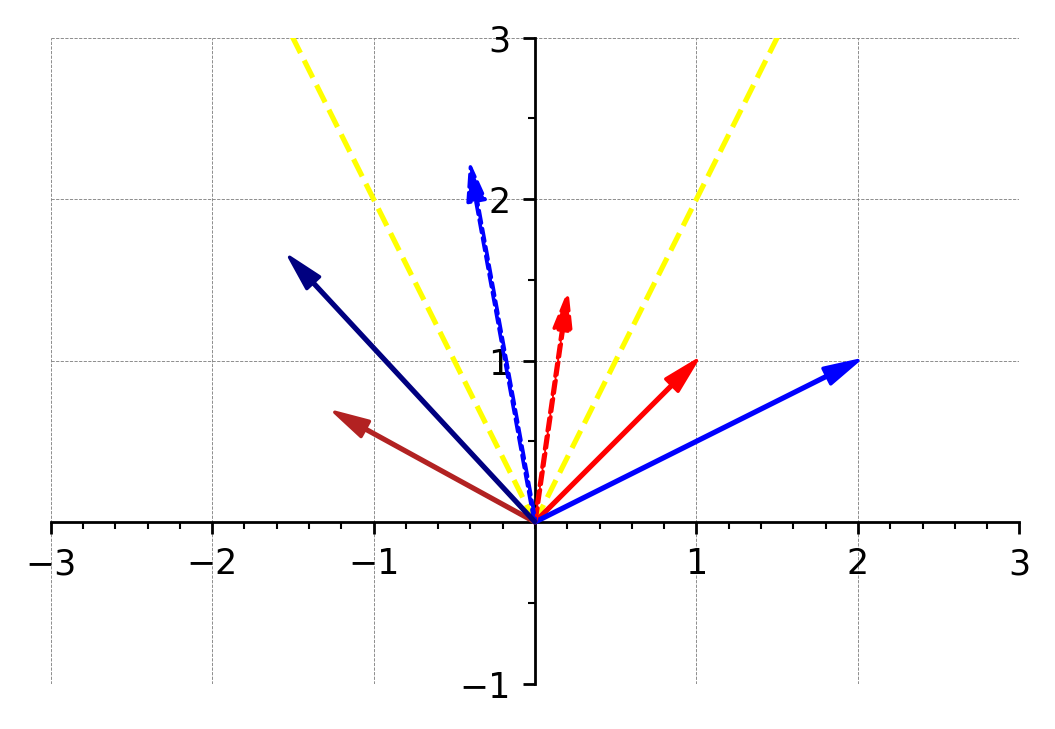

In [14]:
fig03 = plt.figure(num=2, figsize=(5, 5))
ax03 = fig03.add_subplot(1, 1, 1)

#Оформляем систему координат
ax03.set(
    xlim=(-3, 3),
    ylim=(-1, 3),
    aspect='equal',
    xticks=([-3, -2, -1, 1, 2, 3]),
    yticks=([-1, 1, 2, 3])
)

#Переносим оси кординат в центр
ax03.spines['top'].set_visible(False)
ax03.spines['right'].set_visible(False)

ax03.spines['bottom'].set_position('zero')
ax03.spines['left'].set_position('zero')

#Рисуем радиус векторы, через точки, которые ввели ранее
ax03.annotate(text="", xy=P1, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='red'))
ax03.annotate(text="", xy=P2, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='blue'))

#Рисуем прямую А
ax03.plot((A[0][0], A[1][0]), (A[0][1], A[1][1]), color='yellow', linestyle='--')

#Отражаем векторы через формулу v′= ava^-1
p_new1 = a*p1*(a.inv())
P_new1 = np.array([p_new1.value[1], p_new1.value[2]])

ax03.annotate(text="", xy=P_new1, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='red', linestyle='--'))

p_new2 = a*p2*(a.inv())
P_new2 = np.array([p_new2.value[1], p_new2.value[2]])

ax03.annotate(text="", xy=P_new2, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='blue', linestyle='--'))

#Рисуем прямую В
ax03.plot((B[0][0], B[1][0]), (B[0][1], B[1][1]), color='yellow', linestyle='--')

#Отражаем векторы еще раз для получения поворота v′′= RvR* = bav(ba)^−1
p_NEW1 = b*p_new1*(b.inv())
P_NEW1 = np.array([p_NEW1.value[1], p_NEW1.value[2]])

ax03.annotate(text="", xy=P_NEW1, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='firebrick'))

p_NEW2 = b*p_new2*(b.inv())
P_NEW2 = np.array([p_NEW2.value[1], p_NEW2.value[2]])

ax03.annotate(text="", xy=P_NEW2, xytext=(0,0), arrowprops=dict(width=0.5, headwidth=5, headlength=10, color='navy'))